In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("./test-data/onewayanova.txt", sep="\t")

In [2]:
# Full width cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

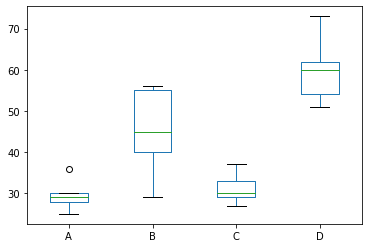

In [3]:
df.boxplot(grid=False)


In [4]:
import scipy.stats as stats

In [5]:
# F 
f_value, p_value = stats.f_oneway(df["A"],df["B"],df["C"],df["D"])
display(f_value)
display(p_value)

17.492810457516338

2.639241146210922e-05

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

display(df)
# We have two or more columns that are identifiers! In our case this would be guess-o-meter & diff + COPE1
# Where each row would represent average speed? In a particular section?
# Convert to two column format
d_melt = pd.melt(df.reset_index(), id_vars=["index"], value_vars=["A","B","C","D"])
d_melt.columns = ["index", "treatment", "value"]

# Ordinary Least Square (OLS) model. What for??
model = ols("value ~C(treatment)", data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, type=2)

d_melt
anova_table

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [13]:
from scipy import stats
import numpy as np

np.random.seed(7654567)  # fix seed to get the same result

rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))

# loc -> specifies the mean
# scale -> specifies the standard deviation

# Test for null hypothesis that the expected value (mean) is equal to the given mean
res = stats.ttest_1samp(rsv, 5.0) # Check if mean is equal to 5
res2 = stats.ttest_1samp(rsv, 0.0) # Check if mean is equal to 0
# If the p-value is less than the chosen sigificance level, the null hypothesis is rejected in favor of the alternative
# The p-value is the probability that the null hypothesis holds true. i.e ther's no difference

print(res)
res2
# In the first case the null hypothesis is accepted since it's p-values are greater than 0.05
# In the first case the null hypothesis is rejected since it's p-values are less than 0.05

Ttest_1sampResult(statistic=array([ 0.59944587, -0.2897877 ]), pvalue=array([0.55163744, 0.77320141]))


Ttest_1sampResult(statistic=array([315.90426125, 328.07819752]), pvalue=array([9.57394503e-83, 1.50242016e-83]))